### Assignment1

Remember -> submission using itslearning, both notebook and github repo *deadline on 22.11.2021* .

#### Task 1 (3 points):

Regression $\to$ Superconductivity Data Set

The goal here is to predict the critical temperature based on the features extracted.

https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

* Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained score as a function of the chosen parameter. Plot the coefficient magnitudes for the best model. 

In [130]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

#plt.rcParams.keys()

In [131]:
df_train = pd.read_csv('train.csv') 

In [132]:
df_train.head(3)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,...,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,...,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,...,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,...,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0


In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [134]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.0000
mean_atomic_mass,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.9804
wtd_mean_atomic_mass,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.9804
gmean_atomic_mass,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.9804
wtd_gmean_atomic_mass,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.9804
...,...,...,...,...,...,...,...,...
range_Valence,21263.0,2.041010,1.242345,0.000000,1.000000,2.000000,3.000000,6.0000
wtd_range_Valence,21263.0,1.483007,0.978176,0.000000,0.921454,1.063077,1.918400,6.9922
std_Valence,21263.0,0.839342,0.484676,0.000000,0.451754,0.800000,1.200000,3.0000
wtd_std_Valence,21263.0,0.673987,0.455580,0.000000,0.306892,0.500000,1.020436,3.0000


In [135]:
df_unique = pd.read_csv('unique_m.csv').drop(['critical_temp','material'],axis=1)

In [136]:
df_unique.head(3)

,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,...,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [137]:
df_unique.describe().T

,count,mean,std,min,25%,50%,75%,max
H,21263.0,0.017685,0.267220,0.0,0.0,0.0,0.0,14.0
He,21263.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Li,21263.0,0.012125,0.129552,0.0,0.0,0.0,0.0,3.0
Be,21263.0,0.034638,0.848541,0.0,0.0,0.0,0.0,40.0
B,21263.0,0.142594,1.044486,0.0,0.0,0.0,0.0,105.0
...,...,...,...,...,...,...,...,...
Pb,21263.0,0.042461,0.274365,0.0,0.0,0.0,0.0,19.0
Bi,21263.0,0.201009,0.655927,0.0,0.0,0.0,0.0,14.0
Po,21263.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
At,21263.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [138]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H       21263 non-null  float64
 1   He      21263 non-null  int64  
 2   Li      21263 non-null  float64
 3   Be      21263 non-null  float64
 4   B       21263 non-null  float64
 5   C       21263 non-null  float64
 6   N       21263 non-null  float64
 7   O       21263 non-null  float64
 8   F       21263 non-null  float64
 9   Ne      21263 non-null  int64  
 10  Na      21263 non-null  float64
 11  Mg      21263 non-null  float64
 12  Al      21263 non-null  float64
 13  Si      21263 non-null  float64
 14  P       21263 non-null  float64
 15  S       21263 non-null  float64
 16  Cl      21263 non-null  float64
 17  Ar      21263 non-null  int64  
 18  K       21263 non-null  float64
 19  Ca      21263 non-null  float64
 20  Sc      21263 non-null  float64
 21  Ti      21263 non-null  float64
 22

# Preprocessing

In [139]:
# Merging both dataframes
df_full = pd.concat([df_train,df_unique],axis=1)
orig_columns = len(df_full.columns)
print(df_full.shape)
df_full.head()

(21263, 168)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,...,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1010.544286,718.152900,938.512777,1.305967,0.783207,810.6,739.575000,323.811808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,775.425,1009.717143,718.152900,937.025573,1.305967,0.805230,810.6,728.807143,323.811808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [140]:
#Now remove all low variance columns (95% of the time they have the same value)
threshold=0.05 #this gets rid of features which are the same value 95% of the time
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=threshold).fit(df_full)
df_full = pd.DataFrame(selector.transform(df_full),columns=df_full.columns[selector.get_support()])
df_full.shape

(21263, 132)

In [141]:
#drop any duplicate features
df_full = df_full.transpose().drop_duplicates(keep='first').transpose()
print(df_full.shape)

(21263, 132)


In [142]:
#Now drop any correlated features
correlation_matrix = df_full.corr() 
mutually_correlated_features = set()  
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            if colname!='critical_temp':
                mutually_correlated_features.add(colname)
print(len(mutually_correlated_features))
df_full.drop(mutually_correlated_features,axis=1,inplace=True)
df_full.shape

55


(21263, 77)

In [143]:
#drop features that have a very low correlation (abs<0.1) with the target variable, critical_temp.

In [144]:
correlation_threshhold = 0.1

corr = pd.DataFrame(df_full.corr()['critical_temp'])
corr['abs'] = np.abs(corr['critical_temp'])
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna().reset_index()
corr = corr.rename(columns={'index':'feature','critical_temp':'corr'}).loc[1:]

low_correlated_features = list(corr[np.abs(corr['corr'])<=correlation_threshhold]['feature'])
df_full.drop(low_correlated_features,axis=1,inplace=True)
df_full.shape

(21263, 36)

In [145]:
df_full.head()

,number_of_elements,mean_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_entropy_fie,range_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,mean_Density,range_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,mean_FusionHeat,range_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,range_Valence,wtd_range_Valence,critical_temp,O,S,Ca,Cu,Sr,Y,Ba,Tl,Bi
0,4.0,88.944468,122.90607,31.794921,775.425,1010.268571,0.791488,810.6,735.985714,160.25,42.914286,4654.35725,8958.571,81.8375,111.727143,127.05,80.987143,6.9055,12.878,107.756645,61.015189,7.062488,0.262848,399.97342,1.0,1.085714,29.0,4.0,0.0,0.0,1.0,0.0,0.0,0.20,0.0,0.0
1,5.0,92.729214,122.90607,36.161939,766.440,1010.612857,0.807078,810.6,743.164286,161.20,50.571429,5821.48580,10488.571,90.8900,112.316429,127.05,81.207857,7.7844,12.878,172.205316,61.372331,16.064228,0.567706,429.97342,2.0,1.128571,26.0,4.0,0.0,0.0,0.9,0.0,0.0,0.10,0.0,0.0
2,4.0,88.944468,122.90607,35.741099,775.425,1010.820000,0.773620,810.6,743.164286,160.25,49.314286,4654.35725,8958.571,81.8375,112.213571,127.05,81.207857,6.9055,12.878,107.756645,60.943760,7.062488,0.250477,399.97342,1.0,1.114286,19.0,4.0,0.0,0.0,1.0,0.0,0.0,0.10,0.0,0.0
3,4.0,88.944468,122.90607,33.768010,775.425,1010.544286,0.783207,810.6,739.575000,160.25,46.114286,4654.35725,8958.571,81.8375,111.970357,127.05,81.097500,6.9055,12.878,107.756645,60.979474,7.062488,0.257045,399.97342,1.0,1.100000,22.0,4.0,0.0,0.0,1.0,0.0,0.0,0.15,0.0,0.0
4,4.0,88.944468,122.90607,27.848743,775.425,1009.717143,0.805230,810.6,728.807143,160.25,36.514286,4654.35725,8958.571,81.8375,111.240714,127.05,80.766429,6.9055,12.878,107.756645,61.086617,7.062488,0.272820,399.97342,1.0,1.057143,23.0,4.0,0.0,0.0,1.0,0.0,0.0,0.30,0.0,0.0


In [146]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  float64
 1   mean_atomic_mass                 21263 non-null  float64
 2   range_atomic_mass                21263 non-null  float64
 3   wtd_range_atomic_mass            21263 non-null  float64
 4   mean_fie                         21263 non-null  float64
 5   wtd_mean_fie                     21263 non-null  float64
 6   wtd_entropy_fie                  21263 non-null  float64
 7   range_fie                        21263 non-null  float64
 8   wtd_range_fie                    21263 non-null  float64
 9   mean_atomic_radius               21263 non-null  float64
 10  wtd_range_atomic_radius          21263 non-null  float64
 11  mean_Density                     21263 non-null  float64
 12  range_Density     

In [147]:
pd.get_option("display.max_columns")

40

In [148]:
# make pandas display upto 40 columns
pd.options.display.max_columns = 40

In [149]:

df_full.describe()

,number_of_elements,mean_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_entropy_fie,range_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,mean_Density,range_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,mean_FusionHeat,range_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,range_Valence,wtd_range_Valence,critical_temp,O,S,Ca,Cu,Sr,Y,Ba,Tl,Bi
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,115.601251,33.225218,769.614748,870.442317,0.926726,572.222612,483.517264,157.983101,51.369885,6111.465214,8665.438818,76.879751,92.717486,120.730514,59.332637,14.296113,21.138994,89.706911,81.549080,29.841727,0.539991,250.893443,2.041010,1.483007,34.421219,3.009129,0.106246,0.258347,1.276751,0.326909,0.177556,0.568440,0.047954,0.201009
std,1.439295,29.676497,54.626887,26.967752,87.488694,143.278200,0.334018,309.614442,224.042874,20.147288,35.019356,2846.785185,4097.126831,27.701890,32.276387,58.700327,28.620409,11.300188,20.370620,38.517485,45.519256,34.059581,0.318248,158.703557,1.242345,0.978176,34.254362,3.811649,0.760821,0.902732,2.079375,0.763625,0.429953,0.983288,0.272298,0.655927
min,1.000000,6.941000,0.000000,0.000000,375.500000,375.500000,0.000000,0.000000,0.000000,48.000000,0.000000,1.429000,0.000000,1.500000,1.500000,0.000000,0.000000,0.222000,0.000000,0.026580,0.026580,0.026580,0.000000,0.000000,0.000000,0.000000,0.000210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,72.458076,78.512902,16.824174,723.740000,738.946339,0.753757,262.400000,291.088889,149.333333,28.598137,4513.500000,6648.000000,62.090000,73.350000,86.700000,34.036000,7.588667,12.878000,61.000000,54.180953,8.339818,0.250677,86.382000,1.000000,0.921454,5.365000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,84.922750,122.906070,26.636008,764.900000,889.966667,0.916843,764.100000,510.440000,160.250000,43.000000,5329.085800,8958.571000,73.100000,102.856863,127.050000,71.156250,9.304400,12.878000,96.504430,73.333333,14.287643,0.545783,399.795000,2.000000,1.063077,20.000000,1.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,100.404410,154.119320,38.356908,796.320000,1004.117384,1.061750,810.600000,690.703310,169.857143,60.224491,6728.000000,9778.571000,85.504167,110.738462,138.630000,76.706965,17.114444,23.200000,111.005316,99.062911,42.371302,0.777353,399.973420,3.000000,1.918400,63.000000,6.800000,0.000000,0.000000,2.815000,0.000000,0.000000,1.350000,0.000000,0.000000
max,9.000000,208.980400,207.972460,205.589910,1313.100000,1348.028986,2.038560,1304.500000,1251.855072,298.000000,240.164344,22590.000000,22588.571000,326.100000,326.100000,349.000000,218.696600,105.000000,104.778000,332.500000,406.960000,317.883627,1.612989,429.974170,6.000000,6.992200,185.000000,66.000000,15.000000,24.000000,98.000000,16.700000,9.000000,24.000000,7.000000,14.000000


In [150]:
X = df_full.drop(['critical_temp'], axis='columns')     # features
y = df_full['critical_temp']                            # target

#### Model 1 - Ridge


In [151]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)



ridge = Ridge().fit(X_scaled_train, y_train)


print("Test set score: {:.2f}".format(ridge.score(X_scaled_test, y_test)))

# prediction critical_temp
y_pred_r = ridge.predict(X_scaled_test)
print('Predicted: ',y_pred_r) 
      

Test set score: 0.67
Predicted:  [-2.59770413 73.75388314 58.8525851  ... 33.30050294 63.48178319
 14.08708659]


#### Model 2 - Lasso

In [152]:


from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_scaled_train, y_train)
print("Test set score: {:.2f}".format(lasso.score(X_scaled_test, y_test)))

# prediction critical_temp
y_pred_l = ridge.predict(X_scaled_test)
print('Predicted: ',y_pred_l) 

Test set score: 0.49
Predicted:  [-2.59770413 73.75388314 58.8525851  ... 33.30050294 63.48178319
 14.08708659]


#### Plot of ridge-scores as a function of the various alphas

In [153]:
# Manually optimize Ridge


# alphas = [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 60]

n_alphas = 200
alphas = np.logspace(0.0001, 10, 30)

scores = []
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_scaled_train, y_train)
    scores.append(ridge.score(X_scaled_test, y_test))
    coefs.append(ridge.coef_)
    
    
print(alphas)
print(scores)

[1.00023029e+00 2.21270816e+00 4.89495018e+00 1.08286026e+01
 2.39550208e+01 5.29932664e+01 1.17231637e+02 2.59339677e+02
 5.73710903e+02 1.26916253e+03 2.80763973e+03 6.21105703e+03
 1.37400925e+04 3.03958150e+04 6.72415833e+04 1.48751745e+05
 3.29068421e+05 7.27964741e+05 1.61040267e+06 3.56253074e+06
 7.88102597e+06 1.74343956e+07 3.85683478e+07 8.53208498e+07
 1.88746675e+08 4.17545155e+08 9.23692859e+08 2.04339217e+09
 4.52038955e+09 1.00000000e+10]
[0.6711243836090133, 0.67080361637865, 0.6687600559192662, 0.662716726279835, 0.6502784315560887, 0.6313696854239196, 0.6092544136450282, 0.5866379924391518, 0.5611517037258051, 0.5241194327758889, 0.4641942143874391, 0.37921006843235283, 0.2721689720061611, 0.11615695587965225, -0.12864185332773737, -0.4256221874960999, -0.67779320526888, -0.839280745070538, -0.9262595476781867, -0.9690021787479806, -0.9890861737699842, -0.9983270837179693, -1.00253807826086, -1.0044485640142136, -1.005313603918942, -1.005704927518106, -1.005881880713

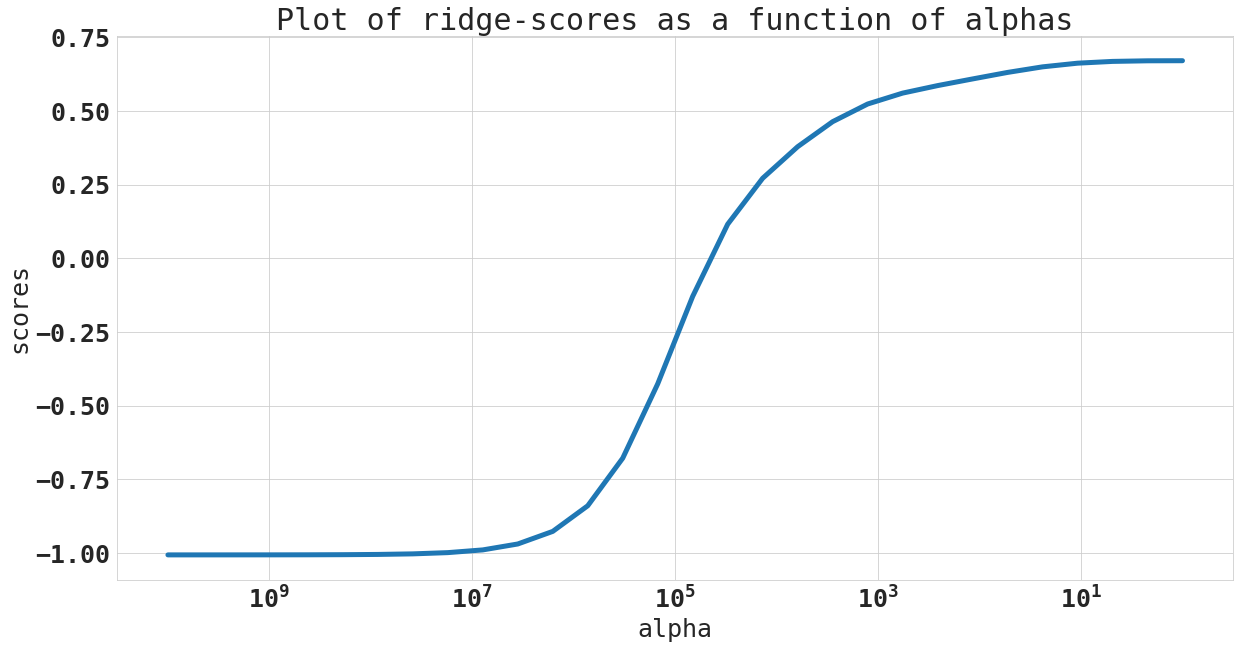

In [155]:
# Display results

ax = plt.gca()

ax.plot(alphas, scores)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("scores")
plt.title("Plot of ridge-scores as a function of alphas")
plt.axis("tight")
plt.show()

#### Plot the coefficient magnitudes for the best model.

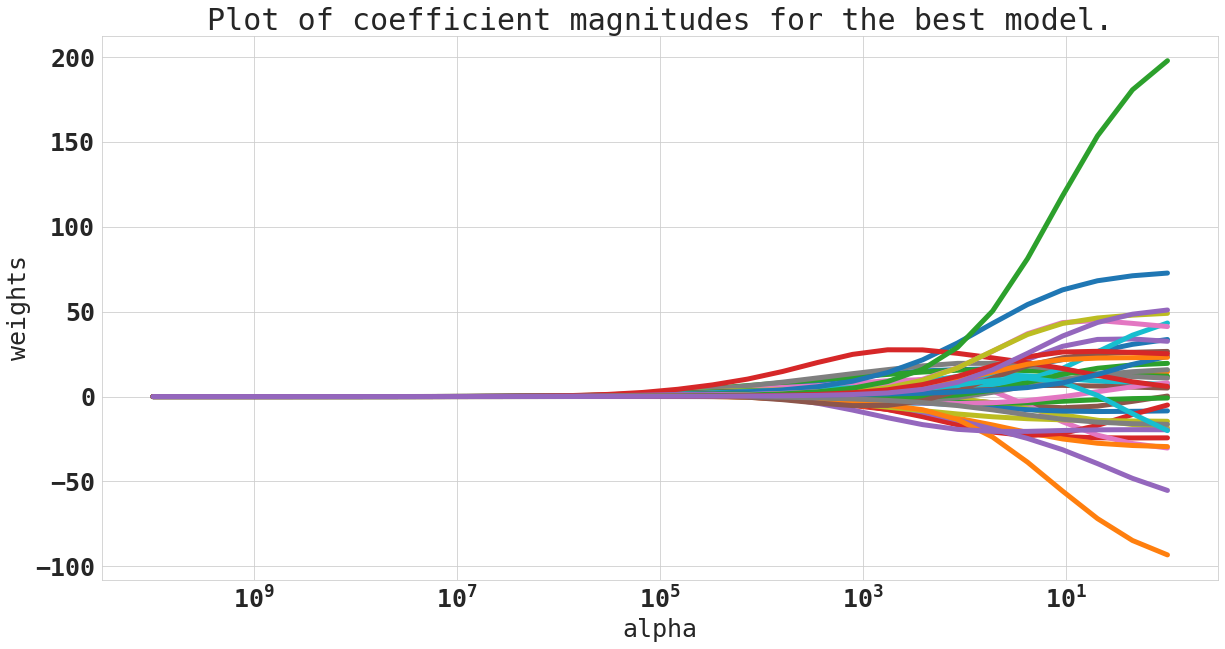

In [156]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Plot of coefficient magnitudes for the best model.")
plt.axis("tight")
plt.show()

#### Task 2 (3 points):

Binary classification $\to$ Default of credit card clients Data Set

The goal here is to predict the default payment next month.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

* Fit two binary classification models to predict the client's credit card default. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained accuracy as a function of the chosen parameter.. Plot the feature importance. 

In [157]:
read_file = pd.read_excel ("credit_card.xls")
  
# Write the dataframe object into csv file
read_file.to_csv ("credit_card.csv", index = None,header=True)
    
# read csv file and convert into a dataframe object
df_cc = pd.DataFrame(pd.read_csv("credit_card.csv"))  
# show the dataframe


In [158]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [159]:
df_cc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [160]:
df_cc.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [161]:
df_cc.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# Data cleaning


In [162]:
df_cc.columns # all the column names

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [163]:
#get correlations of each features in dataset
import seaborn as sns

corrmat = df_cc.corr()
top_corr_features = corrmat.index


plt.figure(figsize=(20,50))

<Figure size 1440x3600 with 0 Axes>

<Figure size 1440x3600 with 0 Axes>

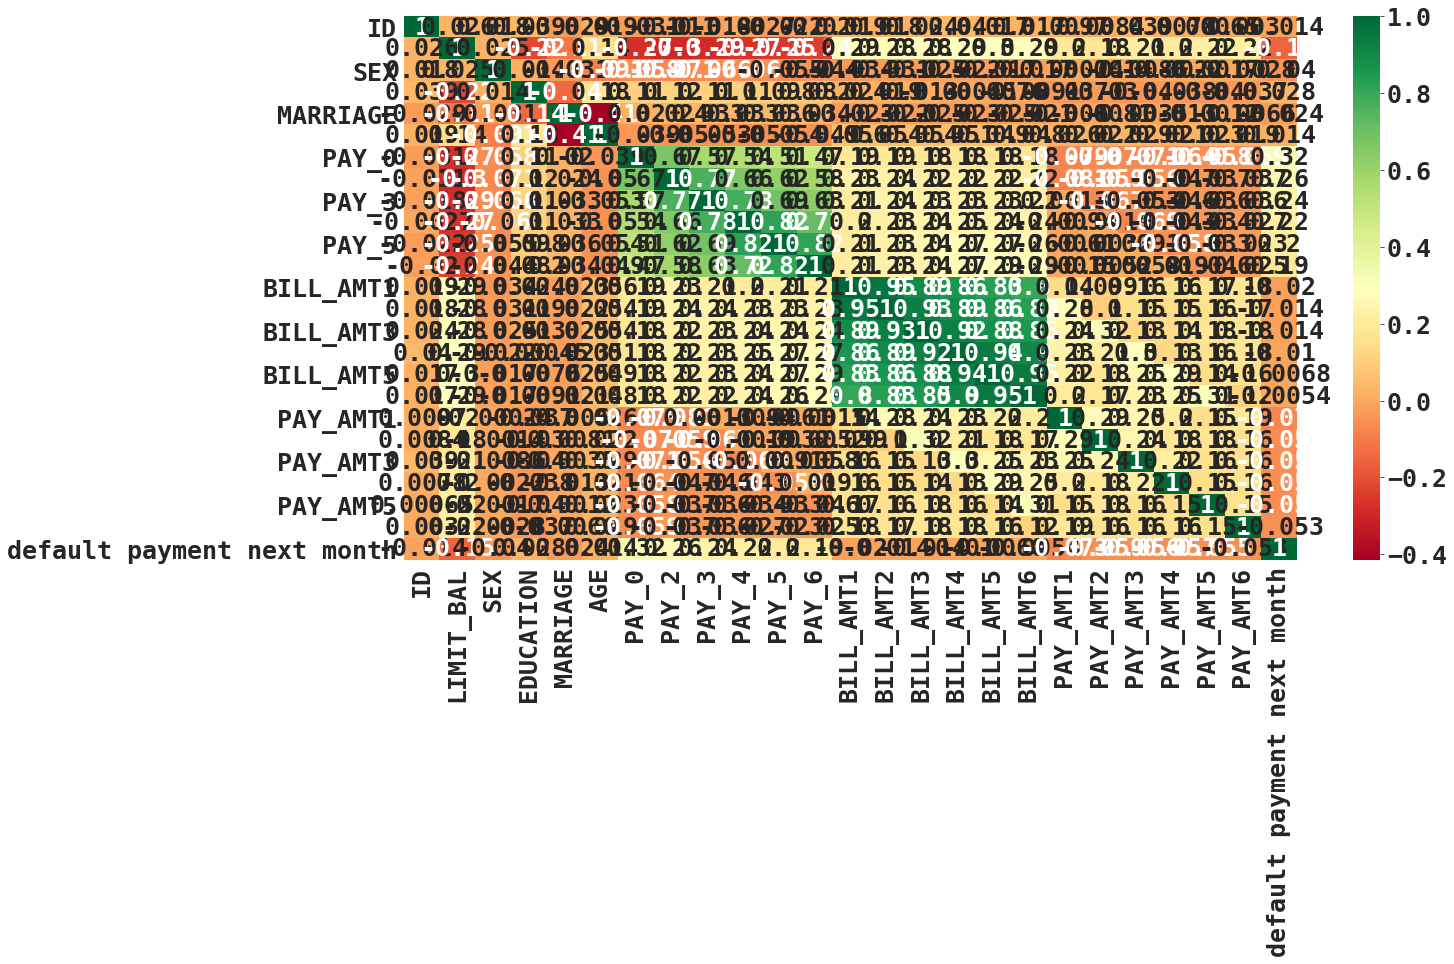

In [164]:
g=sns.heatmap(df_cc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# See those payment columns are really correlated 

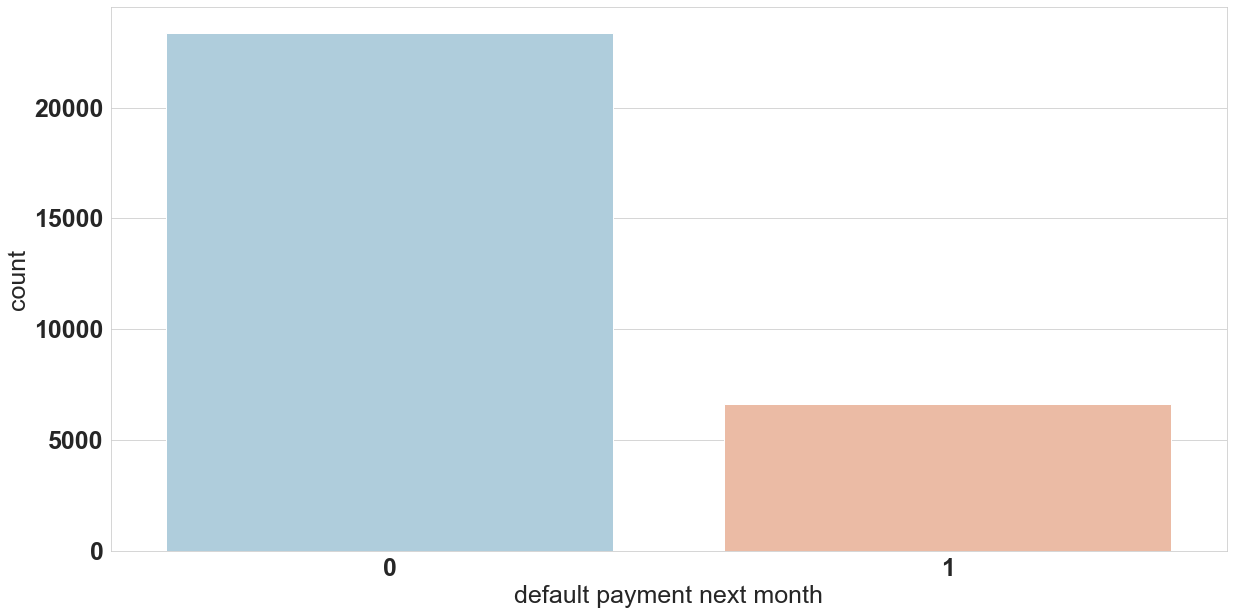

In [165]:
# Inspecting for a balanced dataset
sns.set_style('whitegrid')

sns.countplot(x='default payment next month', data=df_cc, palette='RdBu_r')

####  We have a highly imbalance dataset( alot of defaulters have been captured but non defaulters are few), we will need to resample 

# Preprocessing 

In [166]:
# Before splitting dataset, lets handle the class imbalance

df_cc['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [167]:
# As you can see only 3.5% of the observations were balanced. Therefore, if we were to always predict 0, we would achieve an accuracy of about 96.5%
# Lets Up-sample Minority Class


from sklearn.utils import resample

df_majority = df_cc[df_cc['default payment next month']==0] # Separate majority class
df_minority = df_cc[df_cc['default payment next month']==1] # Separate minority class


# Upsample minority class

df_minority_upsampled = resample(df_minority, 
                                 replace=True,       # sample with replacement
                                 n_samples=23364,    # to match majority class
                                 random_state=123)   # reproducible results


# Combine majority class with upsampled minority class
df_cc = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_cc['default payment next month'].value_counts()

1    23364
0    23364
Name: default payment next month, dtype: int64

In [168]:
# drop Id because it is just a unique identifier
df_cc = df_cc.drop(["ID"], axis=1)

In [169]:
# rename the PAY_0 column with PAY_1 for better understanding
df_cc.rename(columns={'PAY_0':'PAY_1'}, inplace=True)


In [170]:
df_cc.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [171]:
df_cc['EDUCATION'].value_counts() # education column itself contains different categorical labels

2    22376
1    15772
3     8024
5      326
4      143
6       73
0       14
Name: EDUCATION, dtype: int64

In [172]:
# We are seeing categorical labels like 0,1,2,3,4,5,6. 
#These particular labels for example 
#1 basically means the person's last known educational status is school, 
#2 means it's high school, 
#3 means it's college, 
#4 means its university. 
# 0,5 and 6 are not known to us so let us just map them with 4 assuming they are for university. 

df_cc["EDUCATION"] = df_cc["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})


In [173]:
# same mapping for the marrieage column
df_cc["MARRIAGE"] = df_cc["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [189]:
# Standard Scaling to scale down the values within the same distribution based on standard normal distribution.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = df_cc.drop(['default payment next month'], axis=1)
XX = scale.fit_transform(X)

In [190]:
# Creating the dependent feature
Y = df_cc['default payment next month']


In [191]:
#Splitting Data into training and test data
X_train, X_test, Y_train, Y_test= train_test_split(XX,Y,test_size=0.20, random_state=1)

#### Binary classification model 1 _ with default parameter

In [192]:
# Building and Training a Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=123)
model.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
# make predictions

predictions = model.predict(X_test)

In [194]:
#Calculate the accuracy score by comparing the actual values and predicted values.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predictions)

TN, FP, FN, TP = confusion_matrix(Y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  2996
False Positive(FP) =  1435
True Negative(TN)  =  3229
False Negative(FN) =  1686
Accuracy of the binary classification = 0.666


#### Binary classification model 2 _ with default parameter

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model=RandomForestClassifier(random_state=123)
model.fit(X_train,Y_train)

#checking the model accuracy

y_pred = model.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.9317


#### Perform a simple manual optimization for Random forest classifier

In [196]:

n_estimators = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

scores = []

for n in n_estimators:
    RF=RandomForestClassifier(n_estimators=n, criterion='entropy', random_state=1)
    RF.fit(X_train,Y_train)
    y_predRF = RF.predict(X_test)
    scores.append(accuracy_score(Y_test, y_predRF))
    
    
print(n_estimators)
print(scores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.8328696768671089, 0.8783436764391184, 0.8804836293601541, 0.90659105499679, 0.8972822597902846, 0.914615878450674, 0.9069120479349454, 0.9192167772309009, 0.913652899636208, 0.9238176760111277]


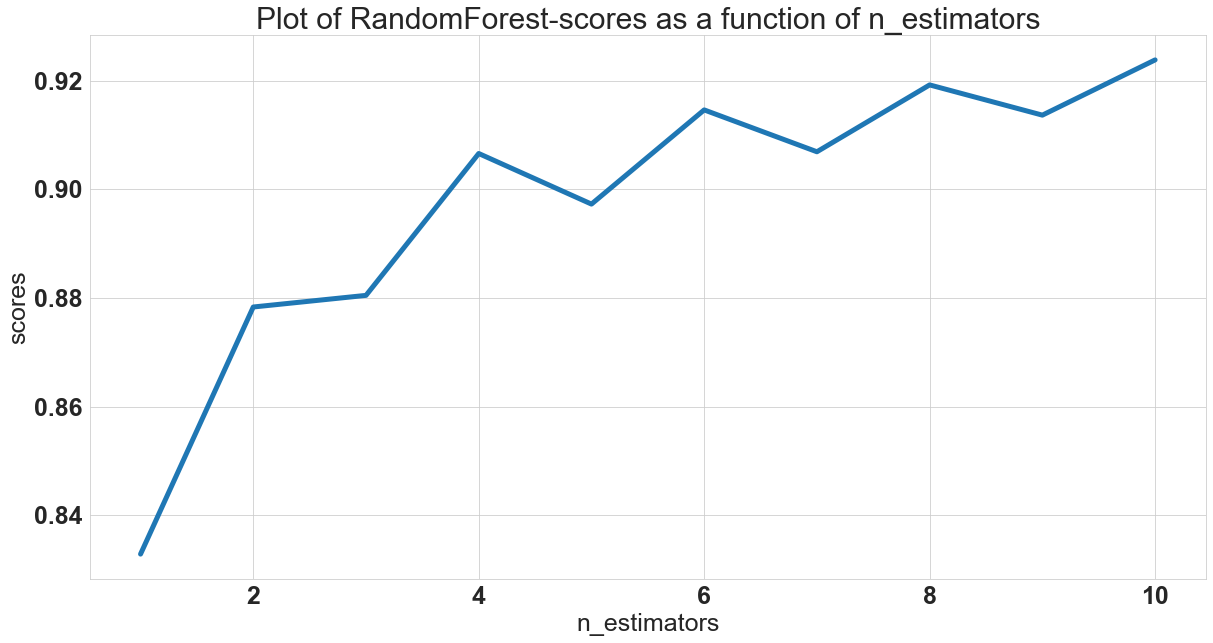

In [197]:
# Display results

ax = plt.gca()

ax.plot(n_estimators, scores)
#ax.set_xscale()
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("n_estimators")
plt.ylabel("scores")
plt.title("Plot of RandomForest-scores as a function of n_estimators")
plt.axis("tight")
plt.show()

#### Feature Importance plot

In [198]:
# Feature importance

print (pd.DataFrame(RF.feature_importances_, columns = ["Importance"], index = X.columns))

           Importance
LIMIT_BAL    0.064866
SEX          0.011149
EDUCATION    0.022436
MARRIAGE     0.012481
AGE          0.064081
PAY_1        0.072345
PAY_2        0.036877
PAY_3        0.032967
PAY_4        0.026230
PAY_5        0.010299
PAY_6        0.013665
BILL_AMT1    0.065031
BILL_AMT2    0.057115
BILL_AMT3    0.053078
BILL_AMT4    0.052938
BILL_AMT5    0.051550
BILL_AMT6    0.052264
PAY_AMT1     0.054715
PAY_AMT2     0.051677
PAY_AMT3     0.052832
PAY_AMT4     0.046399
PAY_AMT5     0.044943
PAY_AMT6     0.050063


Text(0, 0.5, 'Feature Names')

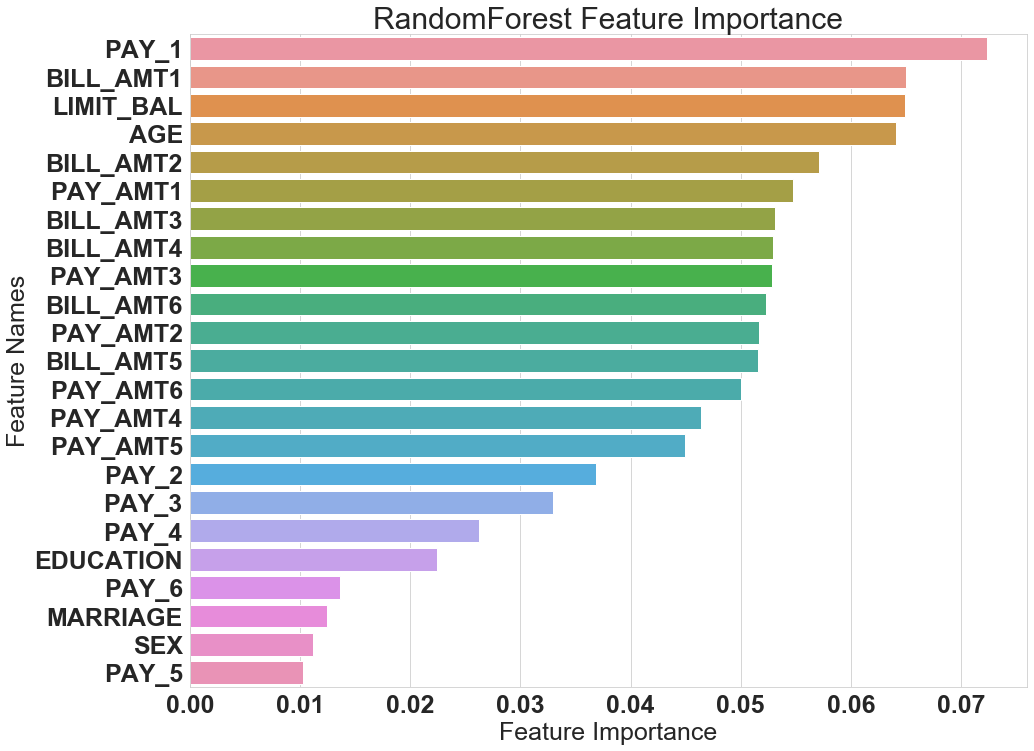

In [210]:
#Create a DataFrame using a Dictionary
data={'feature_names':X.columns,'feature_importance':RF.feature_importances_}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(15,12))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('RandomForest ' + 'Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

# Task 3 (9 points): 

Multiclass & binary classification $\to$ Drug consumption (quantified) Data Set

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

* Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter. 
* Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes. 
* Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
 - one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
 
 Comment your results, and point which selection of classes have better accuracy.

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

pd.set_option('max_columns', None)

<pre>
Please bear in mind the 7 classes in the features

-CL0 Never Used 
-CL1 Used over a Decade  
-CL2 Used in Last Decade 
-CL3 Used in Last Year 
-CL4 Used in Last Month 
-CL5 Used in Last Week 
-CL6 Used in Last Day
</pre>

In [403]:
drug_Cons = pd.read_csv('drug_consumption.data', sep=',')

drug_Cons.columns = ["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore","Oscore","Ascore","Cscore","Impulsivity","SS","Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]
drug_Cons.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsivity,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [404]:
drug_Cons = drug_Cons.drop(labels=['ID','Semer'], axis=1) # drop the ID and the fictitous drug

In [405]:
# data cleaning
# Check for missing values
drug_Cons.isna().sum().sum()

0

In [406]:
drug_Cons.shape[0] , drug_Cons.shape[1] # shape of our dataset

(1884, 30)

In [407]:
drug_Cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1884 non-null   float64
 1   Gender       1884 non-null   float64
 2   Education    1884 non-null   float64
 3   Country      1884 non-null   float64
 4   Ethnicity    1884 non-null   float64
 5   Nscore       1884 non-null   float64
 6   Escore       1884 non-null   float64
 7   Oscore       1884 non-null   float64
 8   Ascore       1884 non-null   float64
 9   Cscore       1884 non-null   float64
 10  Impulsivity  1884 non-null   float64
 11  SS           1884 non-null   float64
 12  Alcohol      1884 non-null   object 
 13  Amphet       1884 non-null   object 
 14  Amyl         1884 non-null   object 
 15  Benzos       1884 non-null   object 
 16  Caff         1884 non-null   object 
 17  Cannabis     1884 non-null   object 
 18  Choc         1884 non-null   object 
 19  Coke  

In [429]:
# Encoding Features

drugs = ['Alcohol',
         'Amphet',
         'Amyl',
         'Benzos',
         'Caff',
         'Choc',
         'Cannabis',
         'Coke',
         'Crack',
         'Ecstasy',
         'Heroin',
         'Ketamine',
         'Legalh',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'VSA'    ]

In [409]:
def drugsEncoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL5':
        return 5
    elif x == 'CL6':
        return 6
    else:
        return 7

In [410]:
for column in drugs:
    drug_Cons[column] = drug_Cons[column].apply(drugsEncoder)

In [411]:
drug_Cons.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsivity,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,0,6,0,4,0,0,0,0,0,0,0,0,0,6,0


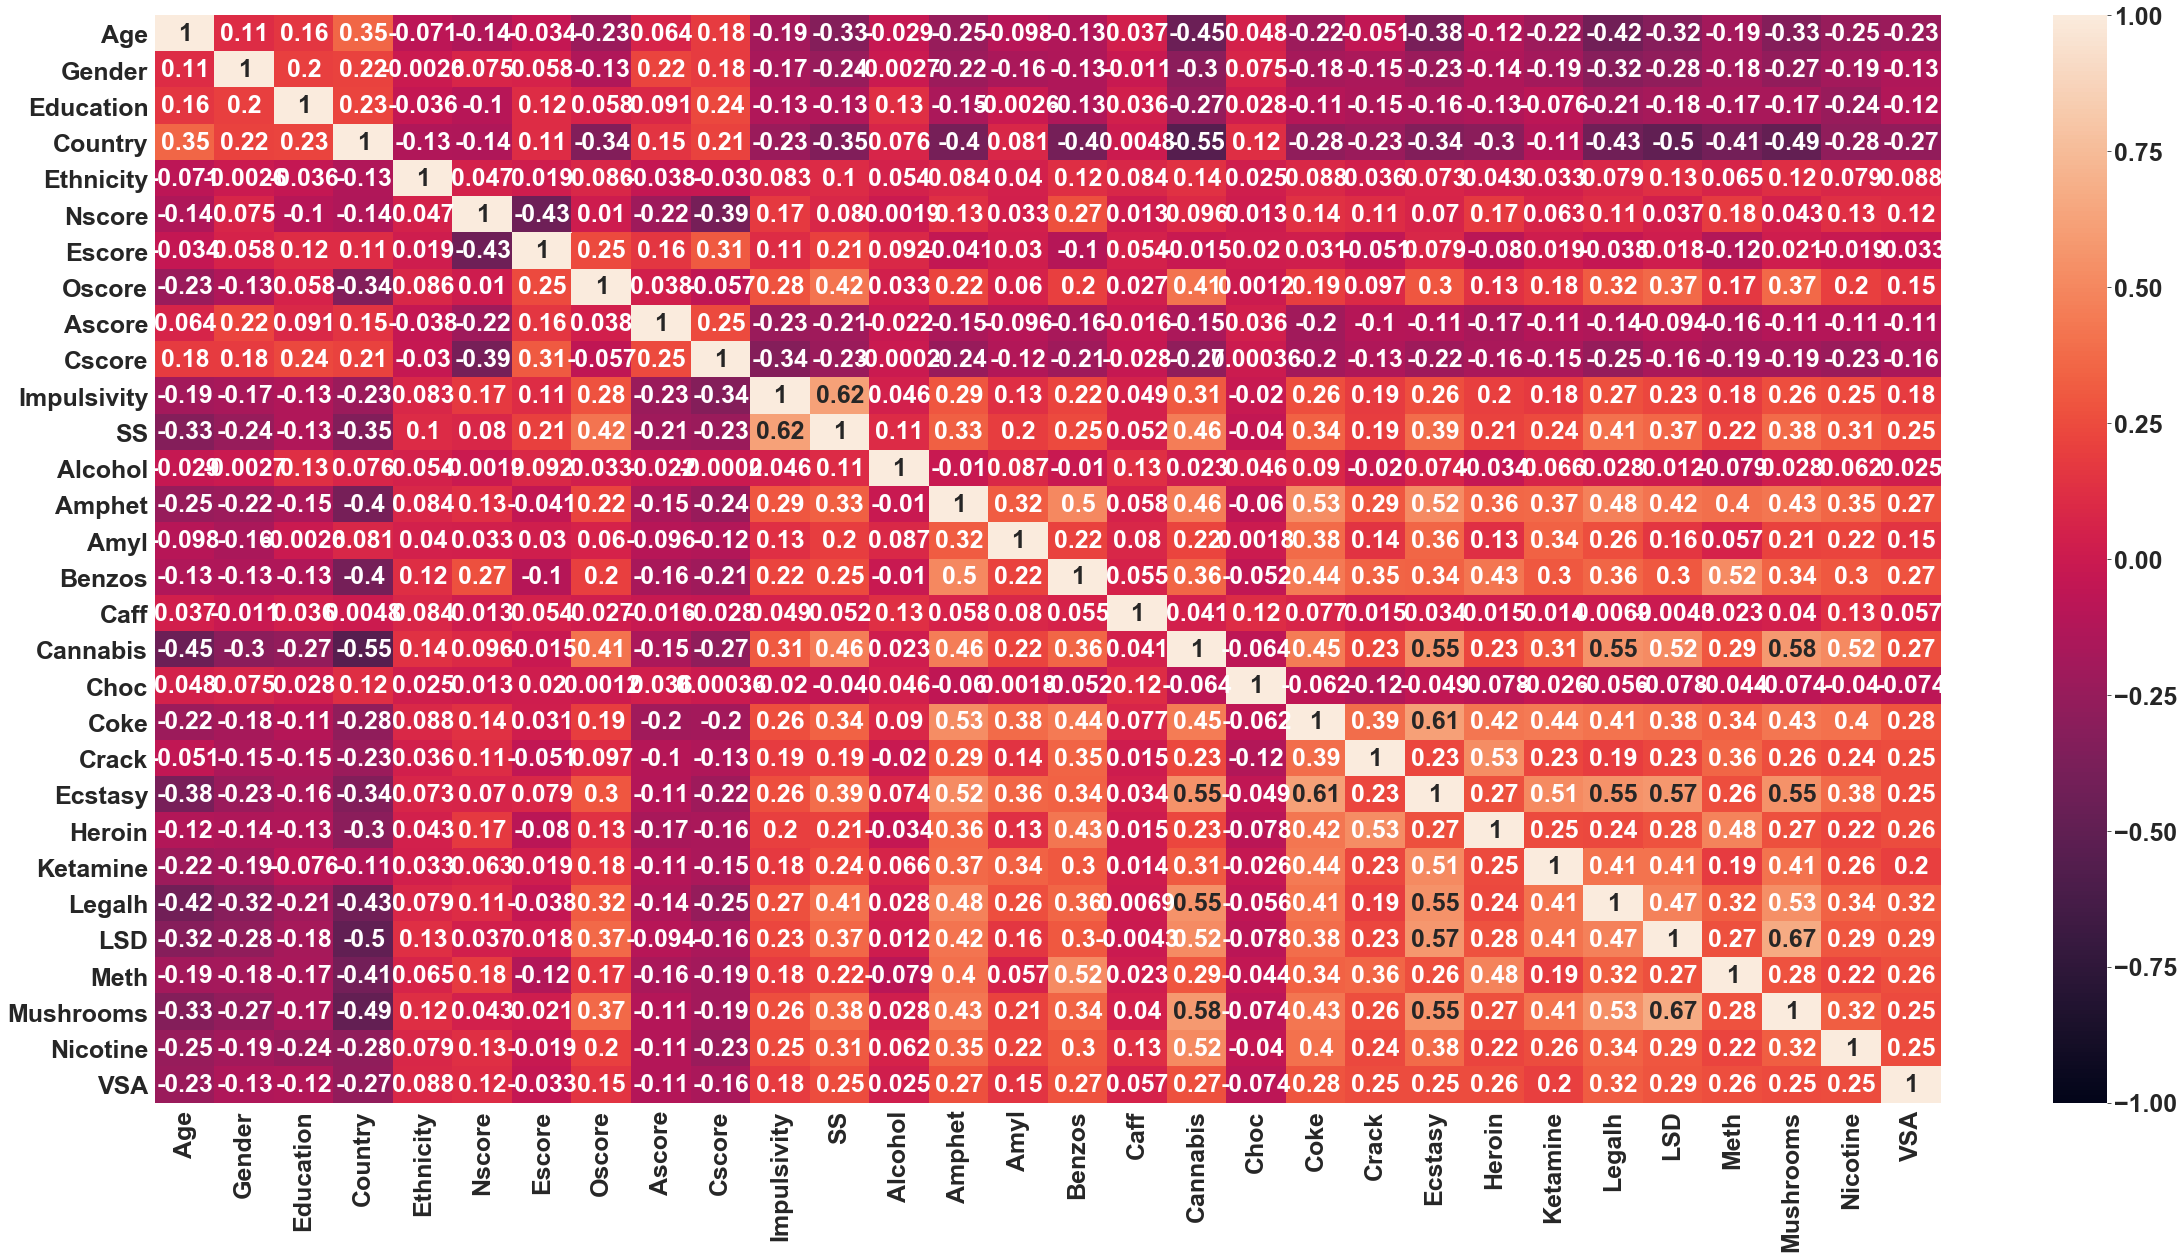

In [348]:
# Let see the correlations

corr = drug_Cons.corr()
plt.figure(figsize=(40,20))
sns.heatmap(corr, annot=True, vmin=-1)

In [349]:
# lets only use data that is highly correlated

low_corr = ["Age","Gender","Education","Country","Ascore","Cscore"]
for column in low_corr:
    drug_Cons = drug_Cons.drop(column, axis=1)
drug_Cons.head()

,Ethnicity,Nscore,Escore,Oscore,Impulsivity,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,-0.31685,-0.67825,1.93886,1.43533,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0
1,-0.31685,-0.46725,0.80523,-0.84732,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0
2,-0.31685,-0.14882,-0.80615,-0.01928,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0
3,-0.31685,0.73545,-1.63340,-0.45174,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0
4,-0.31685,-0.67825,-0.30033,-1.55521,-1.37983,-1.54858,2,0,0,0,6,0,4,0,0,0,0,0,0,0,0,0,6,0


In [350]:
print(f'In the new dataframe there are {drug_Cons.shape[0]} rows and {drug_Cons.shape[1]} columns')

In the new dataframe there are 1884 rows and 24 columns


## - Fit two multiclass classification models to predict two selected features out of 18

In [351]:
# Feature Engineering

# We will create two seperate datasets to predict whether an indivudal uses Cannabis or Nicotine.

# Canabis users

cannabis_df = drug_Cons.copy()
cannabis_df['Cannabis_user'] = cannabis_df['Cannabis'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
cannabis_df = cannabis_df.drop(['Cannabis'], axis=1)
cannabis_df.head()

,Ethnicity,Nscore,Escore,Oscore,Impulsivity,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Cannabis_user
0,-0.31685,-0.67825,1.93886,1.43533,-0.71126,-0.21575,5,2,2,0,6,6,3,0,4,0,2,0,2,3,0,4,0,1
1,-0.31685,-0.46725,0.80523,-0.84732,-1.37983,0.40148,6,0,0,0,6,4,0,0,0,0,0,0,0,0,1,0,0,1
2,-0.31685,-0.14882,-0.80615,-0.01928,-1.37983,-1.18084,4,0,0,3,5,4,2,0,0,0,2,0,0,0,0,2,0,1
3,-0.31685,0.73545,-1.63340,-0.45174,-0.21712,-0.21575,4,1,1,0,6,6,0,0,1,0,0,1,0,0,2,2,0,1
4,-0.31685,-0.67825,-0.30033,-1.55521,-1.37983,-1.54858,2,0,0,0,6,4,0,0,0,0,0,0,0,0,0,6,0,0


In [352]:
# Nicotine users


nicotine_df = drug_Cons.copy()
nicotine_df['Nicotine_user'] = nicotine_df['Nicotine'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
nicotine_df = nicotine_df.drop(['Nicotine'], axis=1)
nicotine_df.head()

,Ethnicity,Nscore,Escore,Oscore,Impulsivity,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA,Nicotine_user
0,-0.31685,-0.67825,1.93886,1.43533,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,0,1
1,-0.31685,-0.46725,0.80523,-0.84732,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0
2,-0.31685,-0.14882,-0.80615,-0.01928,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,0,1
3,-0.31685,0.73545,-1.63340,-0.45174,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,0,1
4,-0.31685,-0.67825,-0.30033,-1.55521,-1.37983,-1.54858,2,0,0,0,6,0,4,0,0,0,0,0,0,0,0,0,0,1


In [353]:
# Data Preprocessing

def preprocessing_inputs(df, column):
    df = df.copy()
    
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test
    

In [354]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot(2,2,1)
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

### Cannabis _ Model Training

In [355]:
X_train, X_test, y_train, y_test = preprocessing_inputs(cannabis_df, 'Cannabis_user')

In [356]:
X_train.head()

,Ethnicity,Nscore,Escore,Oscore,Impulsivity,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
634,-0.05271,-0.680255,0.308361,-0.449647,0.196936,-0.226886,-0.459148,-0.754344,-0.575609,-0.77419,0.457780,0.841086,-0.769651,-0.354292,-0.808575,-0.361527,-0.464372,-0.765927,-0.723714,-0.502044,-0.826732,-1.318169,-0.458146
1593,-0.05271,-0.680255,0.308361,-0.975743,-0.754536,-0.877918,0.288083,-0.754344,0.353131,-0.77419,0.457780,-0.084109,-0.769651,-0.354292,-0.808575,-0.361527,-0.464372,-0.765927,-0.723714,-0.502044,-0.826732,-0.905179,-0.458146
799,-0.05271,0.144423,-0.966048,-0.975743,-1.458262,1.260188,1.035314,2.630659,0.353131,-0.77419,0.457780,-0.084109,1.205146,-0.354292,-0.808575,2.572877,-0.464372,2.587831,0.617783,-0.502044,-0.826732,1.159769,-0.458146
40,-0.05271,0.842763,-0.011456,1.068877,-0.234412,-0.226886,-0.459148,-0.754344,-0.575609,-0.77419,-1.455882,0.841086,-0.769651,-0.354292,-0.808575,-0.361527,-0.464372,-0.765927,-0.723714,-0.502044,-0.826732,-0.905179,-0.458146
888,-0.05271,-1.563894,2.119998,0.889065,-0.234412,0.410322,0.288083,2.630659,1.281870,2.46966,0.457780,-0.084109,1.863411,2.002960,1.598382,2.572877,3.661856,-0.765927,1.288532,1.305075,1.914489,1.159769,0.599168


In [357]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1507, 23) (1507,)
Test set: (377, 23) (377,)


In [358]:
models = {
            '     Logisitc Regression': LogisticRegression(),
            ' Support Vector Machines': SVC()}

In [359]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
 Support Vector Machines trained.


### Model Results

In [360]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 86.21%
 Support Vector Machines Accuracy: 87.53%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.89516
 Support Vector Machines F1-Score: 0.90467


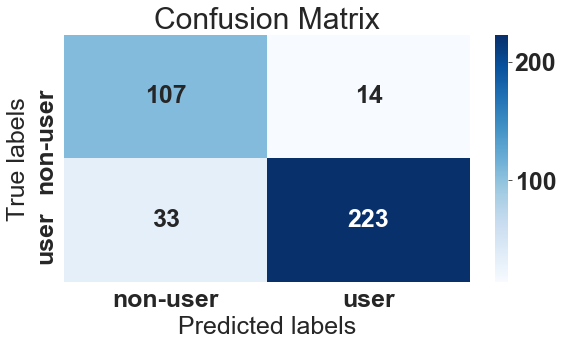

In [361]:
#Confusion Matrix of Best Peforming Model
model = SVC()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

### Nicotine _ Model Training

In [362]:
X_train, X_test, y_train, y_test = preprocessing_inputs(nicotine_df, 'Nicotine_user')

In [363]:
X_train.head()

,Ethnicity,Nscore,Escore,Oscore,Impulsivity,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA
634,-0.05271,-0.680255,0.308361,-0.449647,0.196936,-0.226886,-0.459148,-0.754344,-0.575609,-0.77419,0.457780,-0.870486,0.841086,-0.769651,-0.354292,-0.808575,-0.361527,-0.464372,-0.765927,-0.723714,-0.502044,-0.826732,-0.458146
1593,-0.05271,-0.680255,0.308361,-0.975743,-0.754536,-0.877918,0.288083,-0.754344,0.353131,-0.77419,0.457780,-1.308783,-0.084109,-0.769651,-0.354292,-0.808575,-0.361527,-0.464372,-0.765927,-0.723714,-0.502044,-0.826732,-0.458146
799,-0.05271,0.144423,-0.966048,-0.975743,-1.458262,1.260188,1.035314,2.630659,0.353131,-0.77419,0.457780,0.444404,-0.084109,1.205146,-0.354292,-0.808575,2.572877,-0.464372,2.587831,0.617783,-0.502044,-0.826732,-0.458146
40,-0.05271,0.842763,-0.011456,1.068877,-0.234412,-0.226886,-0.459148,-0.754344,-0.575609,-0.77419,-1.455882,-1.308783,0.841086,-0.769651,-0.354292,-0.808575,-0.361527,-0.464372,-0.765927,-0.723714,-0.502044,-0.826732,-0.458146
888,-0.05271,-1.563894,2.119998,0.889065,-0.234412,0.410322,0.288083,2.630659,1.281870,2.46966,0.457780,0.882701,-0.084109,1.863411,2.002960,1.598382,2.572877,3.661856,-0.765927,1.288532,1.305075,1.914489,0.599168


In [364]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1507, 23) (1507,)
Test set: (377, 23) (377,)


In [365]:
models = {
            '     Logisitc Regression': LogisticRegression(),
            ' Support Vector Machines': SVC()}

In [366]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
 Support Vector Machines trained.


### Model Results

In [367]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 77.72%
 Support Vector Machines Accuracy: 76.39%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.83399
 Support Vector Machines F1-Score: 0.82446


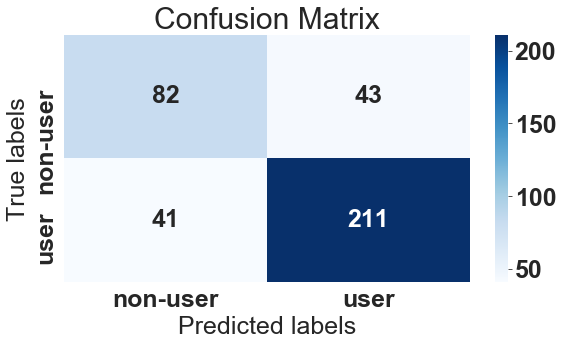

In [368]:
#Confusion Matrix of Best Peforming Model
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

## - Perform a simple manual optimization for one of the default parameters

In [369]:
# Using Logistic Regression model in Nicotine dataset

C_param_range = [0.001,0.01,0.1,1,10,100]

scores = []

for c in C_param_range:
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    y_predlr = lr.predict(X_test)
    scores.append(accuracy_score(y_test, y_predlr))
    
    
print(C_param_range)
print(scores)

[0.001, 0.01, 0.1, 1, 10, 100]
[0.7480106100795756, 0.7851458885941645, 0.7798408488063661, 0.7771883289124668, 0.7771883289124668, 0.7771883289124668]


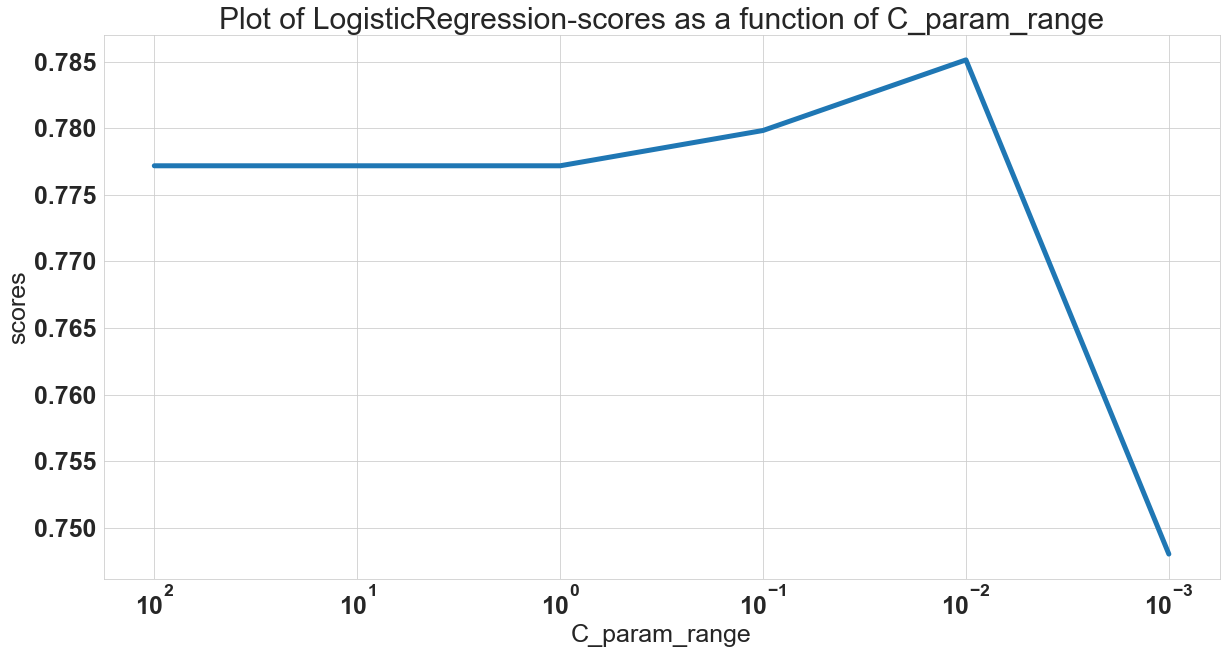

In [372]:
# Display results

ax = plt.gca()

ax.plot(C_param_range, scores)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("C_param_range")
plt.ylabel("scores")
plt.title("Plot of LogisticRegression-scores as a function of C_param_range")
plt.axis("tight")
plt.show()

## - Fit one multiclass classification model for all the rest 16 features

In [374]:
# Feature engineering to the rest 16 drugs

other16_drugs_df = drug_Cons.copy()

other16_drugs_df['Alcohol_user'] = other16_drugs_df['Alcohol'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Alcohol'], axis=1)

other16_drugs_df['Amphet_user'] = other16_drugs_df['Amphet'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Amphet'], axis=1)

other16_drugs_df['Amyl_user'] = other16_drugs_df['Amyl'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Amyl'], axis=1)

other16_drugs_df['Benzos_user'] = other16_drugs_df['Benzos'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Benzos'], axis=1)

other16_drugs_df['Caff_user'] = other16_drugs_df['Caff'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Caff'], axis=1)

other16_drugs_df['Choc_user'] = other16_drugs_df['Choc'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Choc'], axis=1)

other16_drugs_df['Coke_user'] = other16_drugs_df['Coke'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Coke'], axis=1)

other16_drugs_df['Crack_user'] = other16_drugs_df['Crack'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Crack'], axis=1)

other16_drugs_df['Ecstasy_user'] = other16_drugs_df['Ecstasy'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Ecstasy'], axis=1)

other16_drugs_df['Heroin_user'] = other16_drugs_df['Heroin'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Heroin'], axis=1)

other16_drugs_df['Ketamine_user'] = other16_drugs_df['Ketamine'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Ketamine'], axis=1)

other16_drugs_df['Legalh_user'] = other16_drugs_df['Legalh'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Legalh'], axis=1)

other16_drugs_df['LSD_user'] = other16_drugs_df['LSD'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['LSD'], axis=1)

other16_drugs_df['Meth_user'] = other16_drugs_df['Meth'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Meth'], axis=1)

other16_drugs_df['Mushrooms_user'] = other16_drugs_df['Mushrooms'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['Mushrooms'], axis=1)

other16_drugs_df['VSA_user'] = other16_drugs_df['VSA'].apply(lambda x: 1 if x not in [0,1] else 0) # for those not in CL0 and CL1
other16_drugs_df = other16_drugs_df.drop(['VSA'], axis=1)

other16_drugs_df = other16_drugs_df.drop(['Cannabis','Nicotine'], axis=1)

other16_drugs_df.head()

,Ethnicity,Nscore,Escore,Oscore,Impulsivity,SS,Alcohol_user,Amphet_user,Amyl_user,Benzos_user,Caff_user,Choc_user,Coke_user,Crack_user,Ecstasy_user,Heroin_user,Ketamine_user,Legalh_user,LSD_user,Meth_user,Mushrooms_user,VSA_user
0,-0.31685,-0.67825,1.93886,1.43533,-0.71126,-0.21575,1,1,1,0,1,1,1,0,1,0,1,0,1,1,0,0
1,-0.31685,-0.46725,0.80523,-0.84732,-1.37983,0.40148,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,-0.31685,-0.14882,-0.80615,-0.01928,-1.37983,-1.18084,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0
3,-0.31685,0.73545,-1.63340,-0.45174,-0.21712,-0.21575,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
4,-0.31685,-0.67825,-0.30033,-1.55521,-1.37983,-1.54858,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [387]:
# dataset splitting

#X = other16_drugs_df.iloc[:,:6]
#y = other16_drugs_df.iloc[:,6:]
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

col = ['Alcohol_user','Amphet_user','Amyl_user','Benzos_user','Caff_user','Choc_user','Coke_user','Crack_user','Ecstasy_user','Heroin_user','Ketamine_user','Legalh_user','LSD_user','Meth_user','Mushrooms_user','VSA_user']

x_train, x_test, y_train, y_test = preprocessing_inputs(other16_drugs_df, col)



In [391]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

knn=KNeighborsClassifier()
#svc=SVC()
#lr=LogisticRegression()
#dt=DecisionTreeClassifier()
#gnb=GaussianNB()
#rfc=RandomForestClassifier()

#-------------------------------------------------------------------
models=[]
models.append(('KNeighborsClassifier',knn))
#models.append(('SVC',svc))
#models.append(('LogisticRegression',lr))
#models.append(('DecisionTreeClassifier',dt))
#models.append(('GaussianNB',gnb))
#models.append(('RandomForestClassifier',rfc))

#--------------------------------------------------------------------

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score
#--------------------------------------------------------------------
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    #cm=confusion_matrix(y_test,pre)
    #print(cm)
    #print('\n')
    #plt.figure(figsize=(10,40))
    #plt.subplot(911)
    #plt.title(name)
    #print(sns.heatmap(cm,annot=True))
    
    
# ---------------------------------------------------------------------------
#result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
#result


***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.19363395225464192


cross_val_score  - 0.19461612067995046


classification report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       365
           1       0.52      0.48      0.50       135
           2       0.17      0.08      0.11        73
           3       0.58      0.48      0.52       168
           4       0.96      1.00      0.98       363
           5       0.98      1.00      0.99       369
           6       0.48      0.39      0.43       137
           7       0.12      0.03      0.04        38
           8       0.57      0.56      0.56       142
           9       0.23      0.07      0.11        43
          10       0.35      0.16      0.22        

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<pre>
OBSERVATIONS 
(1) - On the accuracy of predicting each we see that 0, 4, 5 (i.e. Alcohol, Caffeine and Chocolate) have very high precision, meaning we have much people taking this

(2) - 1, 3, 6, 8, 11, 12, 14 (Amphet, Benzos, Cocaine, Ecstasy, Legalh, LSD, Mushrooms) are been consumed it seems averagely but thats a lot

(3) - 7 and 15 (Crack and VSA) were the list consumed
</pre>

## Run one binary classification model for 3 features out of 18.

<pre>
Test the performance of the model by choosing as:

-one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
-one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
-one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).

Please bear in mind the 7 classes in the features

-CL0 Never Used 
-CL1 Used over a Decade  
-CL2 Used in Last Decade 
-CL3 Used in Last Year 
-CL4 Used in Last Month 
-CL5 Used in Last Week 
-CL6 Used in Last Day
</pre>

#### one class (class 0) the variable "Used in Last Decade" (CL2)

In [434]:
# for the first instance: one class (class 0) the variable "Used in Last Decade" (CL2) and the remaining variables for the other class (class 1).

drug_Cons = pd.read_csv('drug_consumption.data', sep=',')
drug_Cons.columns = ["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore","Oscore","Ascore","Cscore","Impulsivity","SS","Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]
drug_Cons = drug_Cons.drop(labels=['ID','Semer'], axis=1) # drop the ID and the fictitous drug

def drugsEncoder(x):
    if x == 'CL1':
        return 1
    elif x == 'CL3':
        return 1
    elif x == 'CL4':
        return 1
    elif x == 'CL5':
        return 1
    elif x == 'CL6':
        return 1
    elif x == 'CL7':
        return 1
    else:
        return 0


for column in drugs:
    drug_Cons[column] = drug_Cons[column].apply(drugsEncoder)


drug_Cons = drug_Cons.drop(labels=['Benzos','Caff','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','VSA'], axis=1) # 



    

# lets only use data that is highly correlated
corr = drug_Cons.corr()
low_corr = ["Age","Gender","Education","Country","Ascore","Cscore"]
for column in low_corr:
    drug_Cons = drug_Cons.drop(column, axis=1)

    
# dataset splitting
col = ['Alcohol','Amphet','Amyl']
x_train, x_test, y_train, y_test = preprocessing_inputs(drug_Cons, col)


knn=KNeighborsClassifier()
#-------------------------------------------------------------------
models=[]
models.append(('KNeighborsClassifier',knn))
#--------------------------------------------------------------------

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score
#--------------------------------------------------------------------
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')


***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.5384615384615384


cross_val_score  - 0.19461612067995046


classification report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       361
           1       0.49      0.45      0.47       132
           2       0.19      0.05      0.08        58

   micro avg       0.82      0.77      0.80       551
   macro avg       0.55      0.50      0.51       551
weighted avg       0.76      0.77      0.76       551
 samples avg       0.87      0.82      0.81       551





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### one class (class 0) the variables "Used in Last Decade" and "Used in Last Year"

In [435]:

drug_Cons = pd.read_csv('drug_consumption.data', sep=',')
drug_Cons.columns = ["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore","Oscore","Ascore","Cscore","Impulsivity","SS","Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]
drug_Cons = drug_Cons.drop(labels=['ID','Semer'], axis=1) # drop the ID and the fictitous drug

def drugsEncoder(x):
    if x == 'CL1':
        return 1
    elif x == 'CL3':
        return 0
    elif x == 'CL4':
        return 1
    elif x == 'CL5':
        return 1
    elif x == 'CL6':
        return 1
    elif x == 'CL7':
        return 1
    else:
        return 0


for column in drugs:
    drug_Cons[column] = drug_Cons[column].apply(drugsEncoder)


drug_Cons = drug_Cons.drop(labels=['Benzos','Caff','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','VSA'], axis=1) # 



# lets only use data that is highly correlated
corr = drug_Cons.corr()
low_corr = ["Age","Gender","Education","Country","Ascore","Cscore"]
for column in low_corr:
    drug_Cons = drug_Cons.drop(column, axis=1)

    
# dataset splitting
col = ['Alcohol','Amphet','Amyl']
x_train, x_test, y_train, y_test = preprocessing_inputs(drug_Cons, col)


knn=KNeighborsClassifier()
#-------------------------------------------------------------------
models=[]
models.append(('KNeighborsClassifier',knn))
#--------------------------------------------------------------------

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score
#--------------------------------------------------------------------
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')


***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.5570291777188329


cross_val_score  - 0.19461612067995046


classification report
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       319
           1       0.46      0.24      0.31        93
           2       0.08      0.03      0.04        36

   micro avg       0.78      0.74      0.76       448
   macro avg       0.46      0.41      0.42       448
weighted avg       0.70      0.74      0.71       448
 samples avg       0.78      0.73      0.73       448





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month"

In [436]:
drug_Cons = pd.read_csv('drug_consumption.data', sep=',')
drug_Cons.columns = ["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore","Oscore","Ascore","Cscore","Impulsivity","SS","Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]
drug_Cons = drug_Cons.drop(labels=['ID','Semer'], axis=1) # drop the ID and the fictitous drug


def drugsEncoder(x):
    if x == 'CL1':
        return 1
    elif x == 'CL3':
        return 0
    elif x == 'CL4':
        return 0
    elif x == 'CL5':
        return 1
    elif x == 'CL6':
        return 1
    elif x == 'CL7':
        return 1
    else:
        return 0


for column in drugs:
    drug_Cons[column] = drug_Cons[column].apply(drugsEncoder)


drug_Cons = drug_Cons.drop(labels=['Benzos','Caff','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','VSA'], axis=1) # 



# lets only use data that is highly correlated
corr = drug_Cons.corr()
low_corr = ["Age","Gender","Education","Country","Ascore","Cscore"]
for column in low_corr:
    drug_Cons = drug_Cons.drop(column, axis=1)

    
# dataset splitting
col = ['Alcohol','Amphet','Amyl']
x_train, x_test, y_train, y_test = preprocessing_inputs(drug_Cons, col)


knn=KNeighborsClassifier()
#-------------------------------------------------------------------
models=[]
models.append(('KNeighborsClassifier',knn))
#--------------------------------------------------------------------

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score
#--------------------------------------------------------------------
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')



***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.44297082228116713


cross_val_score  - 0.19461612067995046


classification report
               precision    recall  f1-score   support

           0       0.70      0.80      0.75       267
           1       0.38      0.14      0.21        77
           2       0.17      0.03      0.05        32

   micro avg       0.66      0.60      0.63       376
   macro avg       0.42      0.33      0.34       376
weighted avg       0.59      0.60      0.58       376
 samples avg       0.56      0.51      0.52       376





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# The accuracies were better off with the second instance "one class (class 0) the variables "Used in Last Decade" and "Used in Last Year"
# followed by the 3th first instance before the third.
# Something must have gone wrong it was suppose to be best in the third instance.